In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [3]:
# b_data = building data
b_data=pd.read_csv('content/building_metadata.csv').dropna(subset=['floor_count'])

In [4]:
b_data

,Unnamed: 0,Unnamed: 0.1,site_id,building_id,primary_use,square_feet,year_built,floor_count,floor,area
0,0,105,1,105,Education,50623,0.0,5.0,1,1
1,1,106,1,106,Education,5374,0.0,4.0,1,0
2,2,107,1,107,Education,97532,2005.0,10.0,2,2
3,3,108,1,108,Education,81580,1913.0,5.0,1,1
4,4,109,1,109,Education,56995,1953.0,6.0,2,1
...,...,...,...,...,...,...,...,...,...,...
350,350,1051,12,1051,Education,28406,0.0,1.0,0,0
351,351,1052,12,1052,Retail,45305,0.0,2.0,0,1
352,352,1054,12,1054,Education,204998,0.0,4.0,1,2
353,353,1055,12,1055,Education,86714,0.0,4.0,1,1


In [5]:
pd.qcut( b_data['floor_count'], [0.25 , 0.5 , 0.75 , 1.0] )

0        (3.0, 5.0]
1        (3.0, 5.0]
2       (5.0, 26.0]
3        (3.0, 5.0]
4       (5.0, 26.0]
           ...     
350    (0.999, 3.0]
351    (0.999, 3.0]
352      (3.0, 5.0]
353      (3.0, 5.0]
354      (3.0, 5.0]
Name: floor_count, Length: 355, dtype: category
Categories (3, interval[float64, right]): [(0.999, 3.0] < (3.0, 5.0] < (5.0, 26.0]]

<AxesSubplot:ylabel='Frequency'>

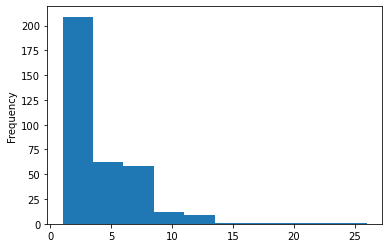

In [6]:
b_data.floor_count.plot(kind='hist')

In [7]:
b_data[b_data.floor_count<15]

,Unnamed: 0,Unnamed: 0.1,site_id,building_id,primary_use,square_feet,year_built,floor_count,floor,area
0,0,105,1,105,Education,50623,0.0,5.0,1,1
1,1,106,1,106,Education,5374,0.0,4.0,1,0
2,2,107,1,107,Education,97532,2005.0,10.0,2,2
3,3,108,1,108,Education,81580,1913.0,5.0,1,1
4,4,109,1,109,Education,56995,1953.0,6.0,2,1
...,...,...,...,...,...,...,...,...,...,...
350,350,1051,12,1051,Education,28406,0.0,1.0,0,0
351,351,1052,12,1052,Retail,45305,0.0,2.0,0,1
352,352,1054,12,1054,Education,204998,0.0,4.0,1,2
353,353,1055,12,1055,Education,86714,0.0,4.0,1,1


In [8]:
pd.qcut( b_data[b_data.floor_count<15].floor_count , [0.25,0.5,0.75,1.0])

0        (2.0, 5.0]
1        (2.0, 5.0]
2       (5.0, 14.0]
3        (2.0, 5.0]
4       (5.0, 14.0]
           ...     
350    (0.999, 2.0]
351    (0.999, 2.0]
352      (2.0, 5.0]
353      (2.0, 5.0]
354      (2.0, 5.0]
Name: floor_count, Length: 351, dtype: category
Categories (3, interval[float64, right]): [(0.999, 2.0] < (2.0, 5.0] < (5.0, 14.0]]

# we will work with the quantiles of the data without caring about outliers

we will assume that building between 1-3 floors as 0 for short
and 1 for medium between 3-5
and 2 for high more than 5

In [9]:
b_data['floor']=pd.qcut( b_data['floor_count'], [0.25 , 0.5 , 0.75 , 1.0], labels=['0','1','2'] )

In [10]:
b_data.head()

,Unnamed: 0,Unnamed: 0.1,site_id,building_id,primary_use,square_feet,year_built,floor_count,floor,area
0,0,105,1,105,Education,50623,0.0,5.0,1,1
1,1,106,1,106,Education,5374,0.0,4.0,1,0
2,2,107,1,107,Education,97532,2005.0,10.0,2,2
3,3,108,1,108,Education,81580,1913.0,5.0,1,1
4,4,109,1,109,Education,56995,1953.0,6.0,2,1


using the same method to create categories for square feet

to know how we will fill the missing values let's see the median


In [11]:
b_data.square_feet.describe()

count       355.000000
mean      72395.360563
std      102739.243998
min         356.000000
25%       14150.000000
50%       40085.000000
75%       93969.500000
max      875000.000000
Name: square_feet, dtype: float64

In [12]:
b_data['square_feet']= b_data['square_feet'].fillna( 72395 )

In [13]:
b_data['area']=pd.qcut( b_data['square_feet'] , [0.25,0.5,0.75,1.0], labels=[0 , 1 , 2])

In [14]:
b_data['area'].fillna(0,inplace=True)

In [15]:
b_data.head()

,Unnamed: 0,Unnamed: 0.1,site_id,building_id,primary_use,square_feet,year_built,floor_count,floor,area
0,0,105,1,105,Education,50623,0.0,5.0,1,1
1,1,106,1,106,Education,5374,0.0,4.0,1,0
2,2,107,1,107,Education,97532,2005.0,10.0,2,2
3,3,108,1,108,Education,81580,1913.0,5.0,1,1
4,4,109,1,109,Education,56995,1953.0,6.0,2,1


In [16]:
#b_data.to_csv('content/building_metadata.csv')

In [17]:
b_data

,Unnamed: 0,Unnamed: 0.1,site_id,building_id,primary_use,square_feet,year_built,floor_count,floor,area
0,0,105,1,105,Education,50623,0.0,5.0,1,1
1,1,106,1,106,Education,5374,0.0,4.0,1,0
2,2,107,1,107,Education,97532,2005.0,10.0,2,2
3,3,108,1,108,Education,81580,1913.0,5.0,1,1
4,4,109,1,109,Education,56995,1953.0,6.0,2,1
...,...,...,...,...,...,...,...,...,...,...
350,350,1051,12,1051,Education,28406,0.0,1.0,0,0
351,351,1052,12,1052,Retail,45305,0.0,2.0,0,1
352,352,1054,12,1054,Education,204998,0.0,4.0,1,2
353,353,1055,12,1055,Education,86714,0.0,4.0,1,1


In [18]:
b_data[ b_data['floor'] == '1' ]

,Unnamed: 0,Unnamed: 0.1,site_id,building_id,primary_use,square_feet,year_built,floor_count,floor,area
0,0,105,1,105,Education,50623,0.0,5.0,1,1
1,1,106,1,106,Education,5374,0.0,4.0,1,0
3,3,108,1,108,Education,81580,1913.0,5.0,1,1
11,11,116,1,116,Education,37265,0.0,5.0,1,0
12,12,117,1,117,Education,15489,2004.0,4.0,1,0
...,...,...,...,...,...,...,...,...,...,...
337,337,1019,10,1019,Entertainment/public assembly,39788,0.0,5.0,1,0
348,348,1044,12,1044,Education,150673,0.0,4.0,1,2
352,352,1054,12,1054,Education,204998,0.0,4.0,1,2
353,353,1055,12,1055,Education,86714,0.0,4.0,1,1


In [19]:
b_data[ b_data['floor'] == '0' ]

,Unnamed: 0,Unnamed: 0.1,site_id,building_id,primary_use,square_feet,year_built,floor_count,floor,area
47,47,152,1,152,Office,10301,1970.0,2.0,0,0
48,48,153,1,153,Office,16092,1965.0,3.0,0,0
51,51,565,4,565,Education,15326,1954.0,2.0,0,0
52,52,566,4,566,Education,2010,1957.0,1.0,0,0
54,54,568,4,568,Education,14150,1974.0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...
346,346,1034,12,1034,Retail,3907,0.0,1.0,0,0
347,347,1039,12,1039,Education,30171,0.0,3.0,0,0
349,349,1050,12,1050,Office,50493,0.0,2.0,0,1
350,350,1051,12,1051,Education,28406,0.0,1.0,0,0


In [20]:
b_data[ b_data['floor'] == '2' ]

,Unnamed: 0,Unnamed: 0.1,site_id,building_id,primary_use,square_feet,year_built,floor_count,floor,area
2,2,107,1,107,Education,97532,2005.0,10.0,2,2
4,4,109,1,109,Education,56995,1953.0,6.0,2,1
5,5,110,1,110,Education,27814,2006.0,8.0,2,0
6,6,111,1,111,Education,118338,1909.0,7.0,2,2
7,7,112,1,112,Education,32206,0.0,6.0,2,0
...,...,...,...,...,...,...,...,...,...,...
239,239,797,7,797,Education,764237,1979.0,13.0,2,2
240,240,798,7,798,Education,409028,1970.0,21.0,2,2
241,241,799,7,799,Education,527431,1976.0,26.0,2,2
244,244,802,7,802,Education,290625,1995.0,19.0,2,2


In [21]:
b_data.query('building_id==125')

,Unnamed: 0,Unnamed: 0.1,site_id,building_id,primary_use,square_feet,year_built,floor_count,floor,area
20,20,125,1,125,Education,16802,1995.0,6.0,2,0


In [22]:
pd.qcut( b_data['floor_count'] , 3)

0       (4.0, 26.0]
1        (2.0, 4.0]
2       (4.0, 26.0]
3       (4.0, 26.0]
4       (4.0, 26.0]
           ...     
350    (0.999, 2.0]
351    (0.999, 2.0]
352      (2.0, 4.0]
353      (2.0, 4.0]
354      (2.0, 4.0]
Name: floor_count, Length: 355, dtype: category
Categories (3, interval[float64, right]): [(0.999, 2.0] < (2.0, 4.0] < (4.0, 26.0]]

In [23]:
pd.qcut( b_data['square_feet'] , 4)

0       (40085.0, 93969.5]
1       (355.999, 14150.0]
2      (93969.5, 875000.0]
3       (40085.0, 93969.5]
4       (40085.0, 93969.5]
              ...         
350     (14150.0, 40085.0]
351     (40085.0, 93969.5]
352    (93969.5, 875000.0]
353     (40085.0, 93969.5]
354     (14150.0, 40085.0]
Name: square_feet, Length: 355, dtype: category
Categories (4, interval[float64, right]): [(355.999, 14150.0] < (14150.0, 40085.0] < (40085.0, 93969.5] < (93969.5, 875000.0]]

In [28]:
b_data[b_data.building_id==122]

,Unnamed: 0,Unnamed: 0.1,site_id,building_id,primary_use,square_feet,year_built,floor_count,floor,area
17,17,122,1,122,Education,83043,1991.0,6.0,2,1


In [40]:
b_data.query('area==1 & primary_use=="Education"')

,Unnamed: 0,Unnamed: 0.1,site_id,building_id,primary_use,square_feet,year_built,floor_count,floor,area
0,0,105,1,105,Education,50623,0.0,5.0,1,1
3,3,108,1,108,Education,81580,1913.0,5.0,1,1
4,4,109,1,109,Education,56995,1953.0,6.0,2,1
14,14,119,1,119,Education,91149,2007.0,7.0,2,1
15,15,120,1,120,Education,68211,1976.0,7.0,2,1
17,17,122,1,122,Education,83043,1991.0,6.0,2,1
18,18,123,1,123,Education,61204,1989.0,6.0,2,1
55,55,569,4,569,Education,86091,1964.0,8.0,2,1
57,57,571,4,571,Education,47954,1980.0,3.0,0,1
60,60,574,4,574,Education,56343,1905.0,4.0,1,1
